Using TensorFlow backend.


 7528448/11490434 [==================>...........] - ETA: 0s(50000, 28, 28) (50000,)


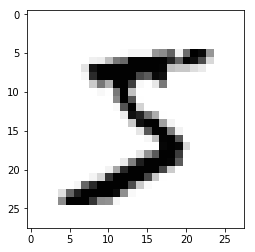

In [6]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
%matplotlib inline

In [48]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
print(X_train_flatten.shape)
y_train_one_hot = np.eye(10)[y_train].T
y_test_one_hot = np.eye(10)[y_test].T

(784, 50000)


In [46]:
X = tf.placeholder(tf.float32,(None,None))
Y = tf.placeholder(tf.float32,(None,None))
W1 = tf.get_variable("W1", [100,784], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1", [100,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [10,100], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", [10,1], initializer = tf.zeros_initializer())

In [57]:
def mini_batch_random(X, Y, mini_batch_size):
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],Y.shape[1]))
    
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

Train Accuracy: 0.99962
Test Accuracy: 0.9768


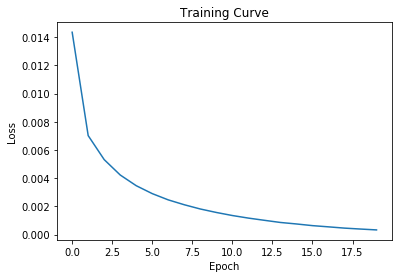

In [65]:
losses = []
Z1 = tf.add(tf.matmul(W1,X),b1)
A1 = tf.nn.sigmoid(Z1)
Z2 = tf.add(tf.matmul(W2,A1),b2)
logits = tf.transpose(Z2)
labels = tf.transpose(Y)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(20):
        epoch_loss = 0
        num_minibatches = int(X_train_flatten.shape[1])
        minibatches = mini_batch_random(X_train_flatten,y_train_one_hot,32)
        for minibatch in minibatches:
            (minibatch_X,minibatch_Y) = minibatch
            _ , minibatch_loss = sess.run([optimizer, loss], feed_dict={X: minibatch_X, Y: minibatch_Y})
            epoch_loss += minibatch_loss / num_minibatches
        losses.append(epoch_loss)
    plt.plot(np.squeeze(losses))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training Curve')
    
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Z2), tf.argmax(Y)), "float"))
    print ("Train Accuracy:", accuracy.eval({X: X_train_flatten, Y: y_train_one_hot}))
    print ("Test Accuracy:", accuracy.eval({X: X_test_flatten, Y: y_test_one_hot}))